# Task 1



### Scraping data from Skytrax





In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Although like many these d...
1,✅ Trip Verified | This flight was British Airw...
2,Not Verified | The worst airline I have ever f...
3,"✅ Trip Verified | Disappointing service, pla..."
4,✅ Trip Verified | A transit visa is required...


In [6]:
df

,reviews
0,✅ Trip Verified | Although like many these d...
1,✅ Trip Verified | This flight was British Airw...
2,Not Verified | The worst airline I have ever f...
3,"✅ Trip Verified | Disappointing service, pla..."
4,✅ Trip Verified | A transit visa is required...
...,...
995,Not Verified | Heathrow to Glasgow. Again fli...
996,✅ Trip Verified | A supremely awful experience...
997,Not Verified | British Airways flight to Brus...
998,✅ Trip Verified | London to Nice. I agree tot...


In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [9]:
df

,reviews
0,"Although like many these days, I avoid BA o..."
1,This flight was British Airways at its very b...
2,The worst airline I have ever flown with. The...
3,"Disappointing service, plane interior and t..."
4,A transit visa is required for my partner t...
...,...
995,Heathrow to Glasgow. Again flight is delayed...
996,A supremely awful experience from beginning t...
997,British Airways flight to Brussels from Heat...
998,London to Nice. I agree totally with the com...


# -----cleaning the data-----

In [12]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()
    

,reviews,Cleaned Reviews
0,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...
1,This flight was British Airways at its very b...,This flight was British Airways at its very b...
2,The worst airline I have ever flown with. The...,The worst airline I have ever flown with They...
3,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...
4,A transit visa is required for my partner t...,A transit visa is required for my partner to ...


In [13]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


In [14]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d..."
1,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes..."
2,The worst airline I have ever flown with. The...,The worst airline I have ever flown with They...,"[(worst, a), (airline, n), (ever, r), (flown, ..."
3,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...,"[(Disappointing, n), (service, n), (plane, n),..."
4,A transit visa is required for my partner t...,A transit visa is required for my partner to ...,"[(transit, n), (visa, n), (required, v), (part..."


In [17]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...
1,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...
2,The worst airline I have ever flown with. The...,The worst airline I have ever flown with They...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly cancel flight hour depa...
3,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...,"[(Disappointing, n), (service, n), (plane, n),...",Disappointing service plane interior terribl...
4,A transit visa is required for my partner t...,A transit visa is required for my partner to ...,"[(transit, n), (visa, n), (required, v), (part...",transit visa require partner transit via Lon...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Although like many these days, I avoid BA o...",Although like many day avoid BA long haul Lo...
1,This flight was British Airways at its very b...,flight British Airways best flight attendant...
2,The worst airline I have ever flown with. The...,bad airline ever fly cancel flight hour depa...
3,"Disappointing service, plane interior and t...",Disappointing service plane interior terribl...
4,A transit visa is required for my partner t...,transit visa require partner transit via Lon...
...,...,...
995,Heathrow to Glasgow. Again flight is delayed...,Heathrow Glasgow flight delay easier use tra...
996,A supremely awful experience from beginning t...,supremely awful experience begin end Flight ...
997,British Airways flight to Brussels from Heat...,British Airways flight Brussels Heathrow Che...
998,London to Nice. I agree totally with the com...,London Nice agree totally comment make Micha...


# -----sentiment analysis using VADER-----


In [19]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...,-0.7584,Negative
1,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...,0.9814,Positive
2,The worst airline I have ever flown with. The...,The worst airline I have ever flown with They...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly cancel flight hour depa...,-0.8910,Negative
3,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...,"[(Disappointing, n), (service, n), (plane, n),...",Disappointing service plane interior terribl...,-0.9264,Negative
4,A transit visa is required for my partner t...,A transit visa is required for my partner to ...,"[(transit, n), (visa, n), (required, v), (part...",transit visa require partner transit via Lon...,0.1027,Neutral


In [21]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    459
Negative    431
Neutral     110
Name: Analysis, dtype: int64

# -----Representing visually-----

([<matplotlib.patches.Wedge at 0x1b297f92670>,
 [Text(0.1412944026355801, 1.0908876623116859, 'Positive'),
  Text(-0.5024662481295186, -0.9785334278861633, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(0.07706967416486186, 0.5950296339881922, '45.9%'),
  Text(-0.2740724989797374, -0.5337455061197254, '43.1%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

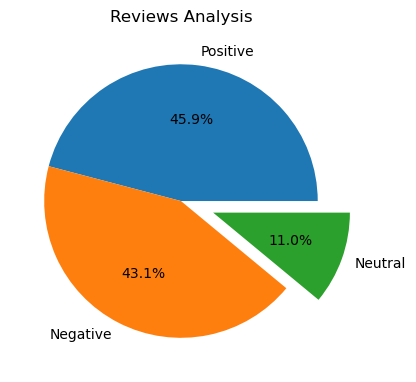

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [23]:
df.to_csv("BA_reviews.csv")

# -----WordCloud-----

In [25]:
!pip install wordcloud

     -------------------------------------- 300.4/300.4 kB 2.3 MB/s eta 0:00:00


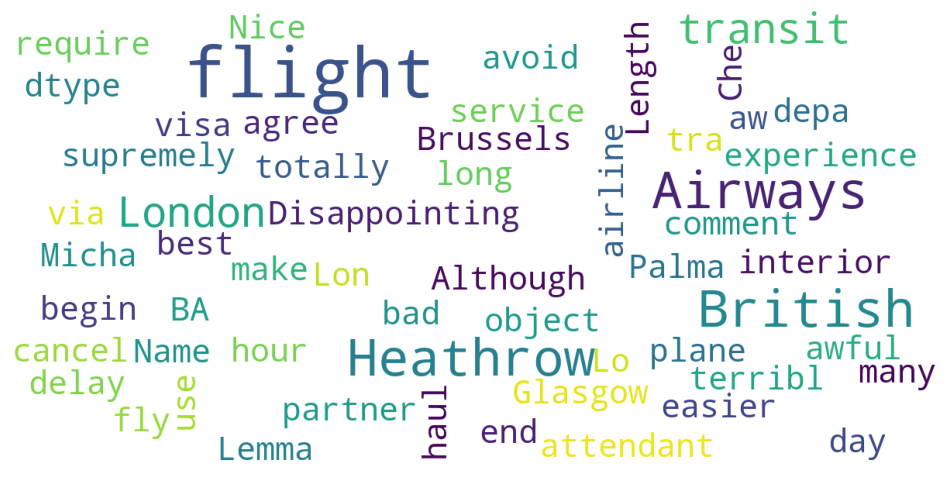

In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)